# Multi-qubit Operations and Circuits using Qiskit

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Importing standard Qiskit libraries 
from qiskit import QuantumCircuit, execute
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import *
from qiskit.quantum_info import *

## Product states
We know that we can construct two-qubit states by taking the tensor product of two single-qubit states. Let's try to do that. We will try this with statevectors and try to reproduce the basis vectors mentioned in lecture. The `Statevector` class are available in the the `qiskit.quantum_info` submodule, which we have imported above. We can perform the tensor product using the `tensor()` method of `Statevector` objects and `Operator` objects. The documentation is available [here](https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.tensor.html#qiskit.quantum_info.Statevector.tensor). If we have two statevectors: `q1_sv` for $|q_1\rangle$ and `q2_sv` for $|q_2\rangle$.

`q1_sv.tensor(q2_sv)` corresponds to the operation $|q_1\rangle \otimes |q_2\rangle$

In [27]:
q1_sv = Statevector.from_label('0')
q2_sv = Statevector.from_label('1')
prod_sv = q1_sv.tensor(q2_sv)
print(prod_sv.data)

[0.+0.j 1.+0.j 0.+0.j 0.+0.j]


We get exactly the statevector that we saw in the lecture. Alternatively, we can also directly create a multi-qubit state using the `from_label()` method.

In [28]:
prod_sv2 = Statevector.from_label('01')
print(prod_sv2.data)

[0.+0.j 1.+0.j 0.+0.j 0.+0.j]


## Multi-qubit operations using tensor products
If we have two operators: `op1` for $0_1$ and `op2` for $O_2$.

`op1.tensor(op2)` corresponds to the operation $O_1 \otimes 0_2$

In [18]:
op1 = Operator.from_label('X')
op2 = Operator.from_label('I')
prod_op = op1.tensor(op2)
print(prod_op.data)

[[0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]


 Alternatively, we can also directly create a multi-qubit operator using the `from_label()` method.

In [23]:
prod_op2 = Operator.from_label('XI')
print(prod_op2.data)

[[0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]


## The tensor product: before and after
We have checked that the multi-qubit product states and operators generated directly by qiskit are the same as the tensor product of the constituent single-qubit states and operator.
. Let us check how unitary operations behave under the tensor product. We want to check whether $$ (O_{1} \otimes O_{2})(|\psi_{1}\rangle \otimes |\psi_{2}\rangle) = O_{1}|\psi_{1}\rangle \otimes O_{2}|\psi_{2}\rangle$$ 
In the section above, we've used $|\psi_{1}\rangle = |0\rangle$, $|\psi_{2}\rangle = |1\rangle$, $O_{1} = X$ and $ O_{2} = I$. The resulting two-qubit state is $|\psi_{1}\rangle \otimes |\psi_{2}\rangle = |\psi_1, \psi_2\rangle = |0,1\rangle \equiv |01\rangle$ (We usually omit the comma in binary notation). The two-qubit operator is $O_{1} \otimes O_{2} = X\otimes I$. 

To verify this, we will `evolve()` the single-qubit states using the single-qubit operators first, then take their tensor product and check if this is equal to the result of using `evolve()` on the two-qubit state using the two-qubit operator.


In [29]:
q1_sv_1 = q1_sv.evolve(op1)
q2_sv_1 = q2_sv.evolve(op2)
prod_sv_1 = q1_sv_1.tensor(q2_sv_1)

In [60]:
prod_sv2_1 = prod_sv2.evolve(prod_op2)

prod_sv_1.equiv(prod_sv2_1)

True

## Quantum circuits for multiple qubits
Quantum circuits behave similarly for multiple qubits as they do for a single qubit. We create a ciruit with a certain number of qubits (given as argument to the `QuantumCircuit()` constructer) and then add operations/gates to the appropriate qubits. 

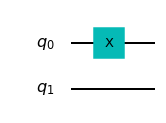

In [32]:
qc = QuantumCircuit(2)
# All qubits start in the |0> state
qc.x(0)
qc.draw(output='mpl')
# qc.measure(0,0) # First argument is the qubit to be measured

We can create an `Operator` from this circuit to check the matrix corresponding to the operation. 

In [33]:
print(Operator(qc).data)

[[0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]]


In [34]:
Operator(qc).equiv(prod_op2)

False

###  Endianness in qiskit
Now that we have started considering multiple quantum registers or qubits, there is the important matter or ordering. The results of measurement for a multi-qubit circuit will be a binary string, and so the ordering of bits is important. This is commonly referred to in computing as [endianness](https://en.wikipedia.org/wiki/Endianness). 

For our purposes, little endian (LE) means that the least-significant bit (LSB), denoted here by the smallest subscript, is written last. An $n$-qubit product state written in the little endian format would read $|q_{n-1}, q_{n-2}, \cdots, q_{2}, q_{1}, q_{0}\rangle$. **This is the convention qiskit uses by default**.

Big endian (BE) means that the most-significant bit (MSB) is written last. This is a convention found in most physics literature. The same $n$-qubit product state written in the big endian format would read $| q_{0}, q_{1}, q_{2} \cdots q_{n-2}, q_{n-1}\rangle$. We have used this notation in the preceding section, which is why the operator was different in both cases.

There is a very simple way to switch between the two representations in qiskit. Every `QuantumCircuit()` has a `reverse_bits()` method that returns a new `QuantumCircuit()` with the order of bits (or qubits) reversed. **Note that this does not change anything in the original circuit**. Since qiskit is LE by default, using this will change it to BE and we should get the same operator as in the previous section. 


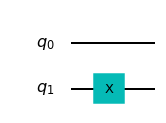

In [35]:
qc_rev = qc.reverse_bits()
qc_rev.draw(output='mpl')

In [36]:
print(Operator(qc_rev).data)

[[0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]


In [37]:
Operator(qc_rev).equiv(prod_op2)

True

## Experiments with multi-qubit circuits

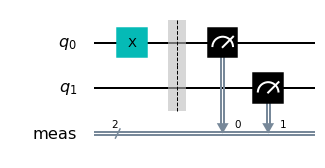

In [56]:
qc2 = QuantumCircuit(2)
# qc2.h(0)
qc2.x(0)
qc2.measure_all()
qc2.draw(output='mpl')

In [57]:
job = execute(qc2, backend=QasmSimulator(), shots=8192)
result = job.result()
result.get_counts()

{'01': 8192}

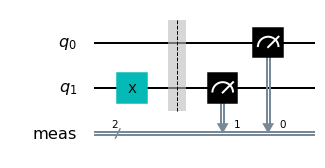

In [58]:
qc2_rev = qc2.reverse_bits()
qc2_rev.draw(output='mpl')

In [59]:
job = execute(qc2_rev, backend=QasmSimulator(), shots=8192)
result = job.result()
result.get_counts()

{'10': 8192}

We will specify the endianness of the problem for any programming assignments henceforth.